# ~ 環境準備

In [2]:
# 掛載雲端硬碟 Mount google drive in CoLab enviroment
#from google.colab import drive
#drive.mount('gdrive')

In [3]:
# 匯入需要的 python 模組
import os, glob
import numpy as np
from scipy import signal
from IPython import display
import matplotlib.pyplot as plt
# 聲音套件 https://librosa.org/doc/main/index.html  
import librosa
import librosa.display

# 音檔路徑

In [6]:
# 檔案名稱為 {ID}.wav
training_voice_dir = "/Users/zhongyongting/1112/ai_workshop/Data/Training Dataset/training_voice_data"
wav_file_list = glob.glob(f"{training_voice_dir}/*.wav")
print("found wav files =", len(wav_file_list), wav_file_list[0])

found wav files = 1000 /Users/zhongyongting/1112/ai_workshop/Data/Training Dataset/training_voice_data/0702ulb.wav


## 1.2 讀取音檔

音訊檔案路徑： /Users/zhongyongting/1112/ai_workshop/Data/Training Dataset/training_voice_data/11015lb.wav
音訊取樣頻率(sampling rate) = 11025 Hz    array shape = (33075,)    dtype = float32


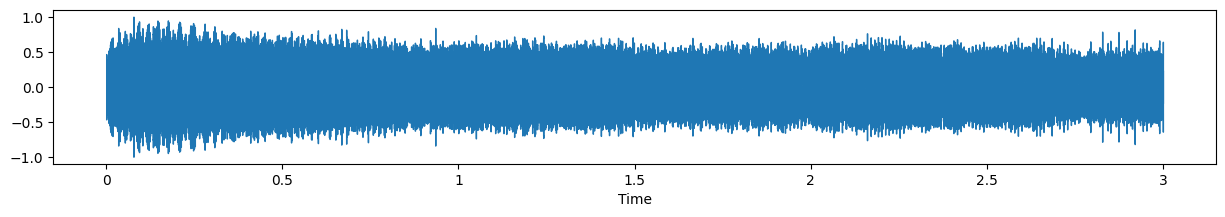

In [7]:
def load_wav(path, target_sr=11025, fix_length=None, normalize=True):
    """Read and normalize a wave file to np.array"""
    waveform, sr = librosa.load(path)
    if waveform.ndim > 1:  # convert to mono
        waveform = librosa.to_mono(waveform)
    if sr != target_sr:  # resmapling to target_sr
        waveform = librosa.resample(waveform, orig_sr=sr, target_sr=target_sr)
        sr = target_sr
    if fix_length != None:  # fix array length
        waveform = librosa.util.fix_length(waveform, size=fix_length)
    if normalize:
        waveform = waveform / np.abs(waveform).max()
    return waveform, sr

# function test:
idx = np.random.choice(len(wav_file_list), size=1)[0]  # 隨機選一個資料索引
path = wav_file_list[idx]
print("音訊檔案路徑：", path)

waveform, sr = load_wav(path)

# show
print(f"音訊取樣頻率(sampling rate) = {sr} Hz    array shape = {waveform.shape}    dtype = {waveform.dtype}")
fig = plt.figure(figsize=(15, 2))
librosa.display.waveshow(waveform, sr=sr)
plt.show()
display.display(display.Audio(waveform, rate=sr))

## 過濾雜訊
https://www.kaggle.com/code/mauriciofigueiredo/methods-for-sound-noise-reduction

音訊取樣頻率(sampling rate) = 11025 Hz    array shape = (33075,)    dtype = float64


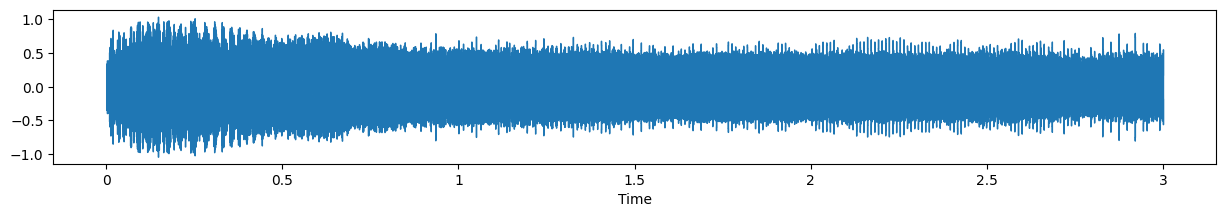

In [8]:
def high_pass_filter(y, sr, critical_freq=100): 
    b, a = signal.butter(10, critical_freq/(sr/2), btype='highpass')
    yf = signal.lfilter(b, a, y)
    return yf

# function test:
filtered = high_pass_filter(waveform, sr)
# show
print(f"音訊取樣頻率(sampling rate) = {sr} Hz    array shape = {filtered.shape}    dtype = {filtered.dtype}")
fig = plt.figure(figsize=(15, 2))
librosa.display.waveshow(filtered, sr=sr)
plt.show()
display.display(display.Audio(filtered, rate=sr))

音訊取樣頻率(sampling rate) = 11025 Hz    array shape = (33075,)    dtype = float64


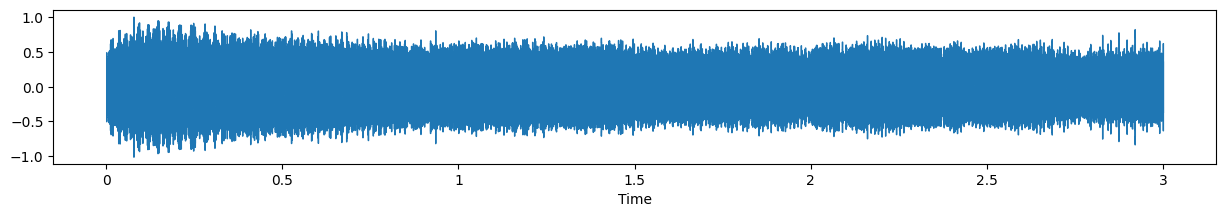

In [9]:
def low_pass_filter(y, sr, critical_freq=5000): 
    b, a = signal.butter(10, critical_freq/(sr/2), btype='lowpass')
    yf = signal.lfilter(b, a, y)
    return yf

# function test:
filtered = low_pass_filter(waveform, sr)
# show
print(f"音訊取樣頻率(sampling rate) = {sr} Hz    array shape = {filtered.shape}    dtype = {filtered.dtype}")
fig = plt.figure(figsize=(15, 2))
librosa.display.waveshow(filtered, sr=sr)
plt.show()
display.display(display.Audio(filtered, rate=sr))